# Heart Failure Prediction

Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure

Definition of done: Create a model for predicting mortality caused by Heart Failure.

Reference: 
Accessed by Capes periodicos

1. MCMURRAY,John; PONIKOWSKI,Piotr. **Heart Failure Not Enough Pump Iron?** Glasgow, Scotland, United Kingdom and Wroclaw, Poland

2. AM,Heart J **Clinical predictors of heart failure in patients with first acute myocardial infarction** 

3. ALI,Abbas S.;**Clinical predictors of heart failure in patients with first acute myocardial infarction**

4. GOMES,Marilia B **Impact of Diabetes on Cardiovascular Disease: An Update**

5. **Creatine phosphokinase test**: https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test

In [1]:
import pandas
df = pandas.read_csv('Dataset.csv')
df.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [2]:
df.isnull().values.any()

False

In [3]:
total = df.shape[0]
print("total of pacients %s"%(total))


total of pacients 299


In [4]:
total_death =df[df['DEATH_EVENT'] == 1 ].count()[0]

The dataset has 13 features from 299 pacients  

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [37]:
df.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [7]:
df.median()

age                             60.0
anaemia                          0.0
creatinine_phosphokinase       250.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure              0.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
time                           115.0
DEATH_EVENT                      0.0
dtype: float64

In [169]:
df.max()

age                             95.0
anaemia                          1.0
creatinine_phosphokinase      7861.0
diabetes                         1.0
ejection_fraction               80.0
high_blood_pressure              1.0
platelets                   850000.0
serum_creatinine                 9.4
serum_sodium                   148.0
sex                              1.0
smoking                          1.0
time                           285.0
DEATH_EVENT                      1.0
dtype: float64

**CORRELATION ANALYSIS TO UNDERSTAND THE INFLUENCE OF EACH FEATURE**

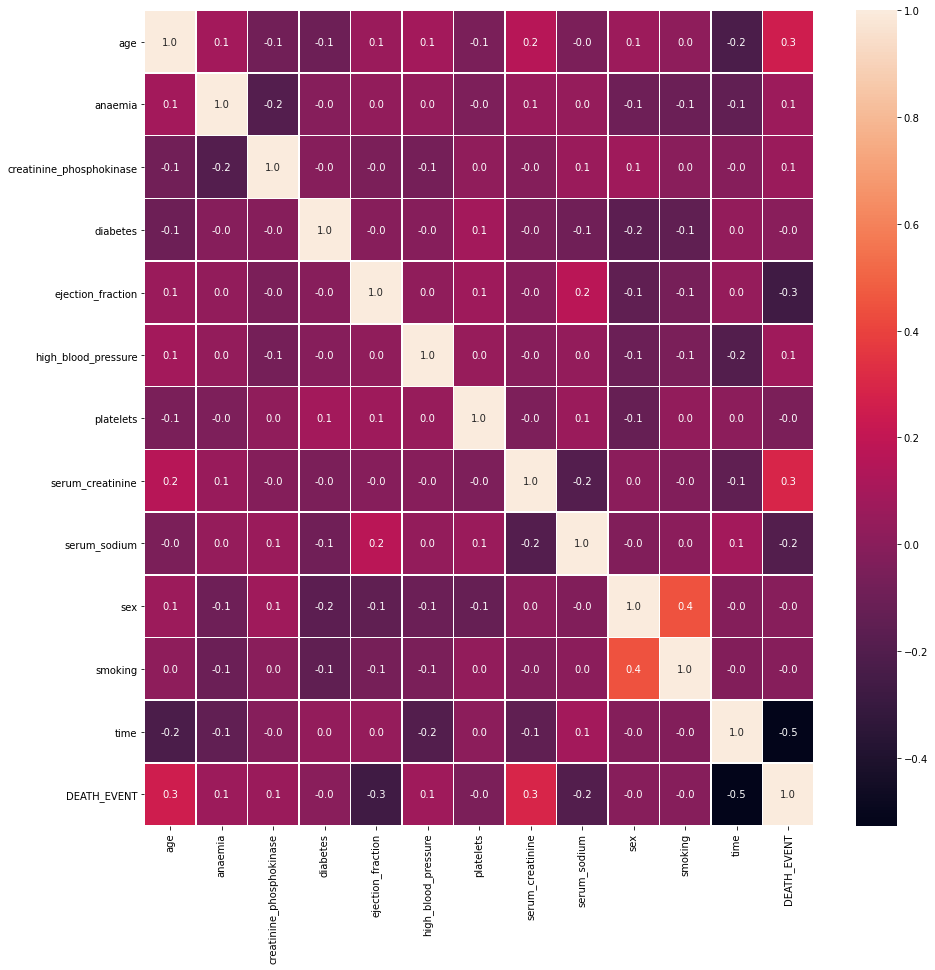

In [36]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Hypotesis and Application from articles

**Clinical predictors of heart failure in patients with first acute myocardial infarction** -
"Predictors of early heart failure include previous medical conditions and age. The second peak occurrence can be predicted by similar characteristics in addition to increased peak creatine phosphokinase level, decreased left ventricular ejection fraction, and increased heart rate" (Am Heart J 1999;138:1133-9.)

**Consideration** :

__Normal Values__:


  - Creatine phosphokinase: 2 - 210 mcg/L

  - Ejection fraction     : 50 %
  
  - Medical Follow-up : >=60 days

**For this dataset, does creatine phosphokinase (increase) and ejection fraction (decrease) are behaving regarding a health valeu as the article metioned?**

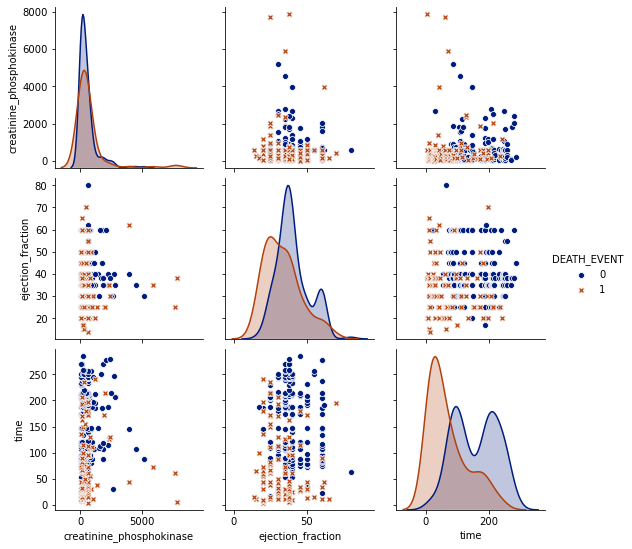

In [8]:
import seaborn as sns; 
g1 = sns.pairplot(df,vars= ['creatinine_phosphokinase','ejection_fraction','time'], hue= 'DEATH_EVENT',markers=["o", "X" ],palette='dark')

% Death event of people who creatinine phosphokinase increased over normal, ejection fraction under normal and medical follow up under the stander 60 days :

In [9]:
H1 = df[['creatinine_phosphokinase', 'ejection_fraction','DEATH_EVENT','time']][(df['creatinine_phosphokinase'] > 210) & (df['ejection_fraction'] < 50) & (df['time'] < 60)]
H1['DEATH_EVENT'].mean()


0.92

% Death event of people who creatinine phosphokinase increased over normal, ejection fraction under normal and medical follow up under the stander 60 days :

In [10]:
H1 = df[['creatinine_phosphokinase', 'ejection_fraction','DEATH_EVENT','time']][(df['creatinine_phosphokinase'] > 210) & (df['ejection_fraction'] < 50) & (df['time'] >= 60)]
H1['DEATH_EVENT'].mean()

0.21367521367521367

Going a little deeper...

In [11]:
H1 = df[['creatinine_phosphokinase', 'ejection_fraction','DEATH_EVENT']][(df['creatinine_phosphokinase'] > 210) & (df['ejection_fraction'] < 50) & (df['DEATH_EVENT'] == 1)]
deathCr = H1['DEATH_EVENT'].count()


In [12]:
H1 = df[['creatinine_phosphokinase', 'ejection_fraction','DEATH_EVENT']][(df['creatinine_phosphokinase'] > 210) & (df['ejection_fraction'] < 50)]

print(r'%s pacients of 299 had values had not normal value for each feature. Representing %s percent of pacients and %s percent of total death.  '%(H1.shape[0],round(((H1.shape[0]*100)/total),2), (deathCr*100)/total_death ))

142 pacients of 299 had values had not normal value for each feature. Representing 47.49 percent of pacients and 50.0 percent of total death.  


**CONCLUSION**

 The value for creatinine phospkinase and ejection fraction are definitely significant for prediction of a heart failure. But a long-term medical follow-up must reduce drastically the chance of death. Which 92 % of the pacients passed away due heart failure who had creatinine phosphokinase's level above normal, ejection fraction under normal and medical follow-up less than 60 days. But, on another hand, only 21%  with same creatinine and ejection fraction behavior and medical follow-up equal, or more, than 60 days passed away due a heart failure pacients
 
 These unbalaced values are 47.5% of pacients and  50% of total of death in hole dataset. 

**Role of Diabetes in Congestive Heart Failure** - "Men aged 45 to 74 years had more than twice the frequency of congestive heart failure as their nondiabetic cohorts, and diabetic women had a fivefold increased risk."

**For this dataset, What the frequency of diabetic-men aged 45 to 74 years to had heart failure more than non-diabetic? What the same analyze for women 30 to 62 years ?**

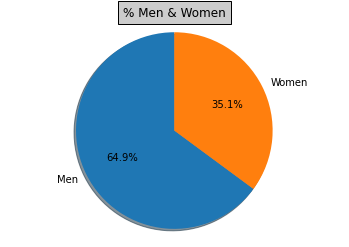

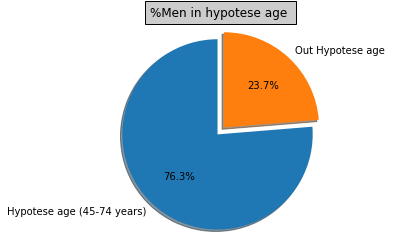

In [13]:
man   =  df['sex'][(df['sex'] == 1)]
woman =  df['sex'][(df['sex'] == 0)]

m = (man.count()*100)/total
w = (woman.count()*100)/total


import matplotlib.pyplot as plt

labels = 'Men','Women' 
sizes  = [m,w]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% Men & Women", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

AM = df[['age','sex']][(df['sex'] == 1) & (df['age'] >= 45) & (df['age'] <= 74)]

labels = 'Hypotese age (45-74 years)','Out Hypotese age' 
sizes  = [(AM.count()[0]*100)/man.count(),((man.count()-AM.count()[0])*100)/man.count()]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("%Men in hypotese age ", bbox={'facecolor':'0.8', 'pad':5})
plt.show()



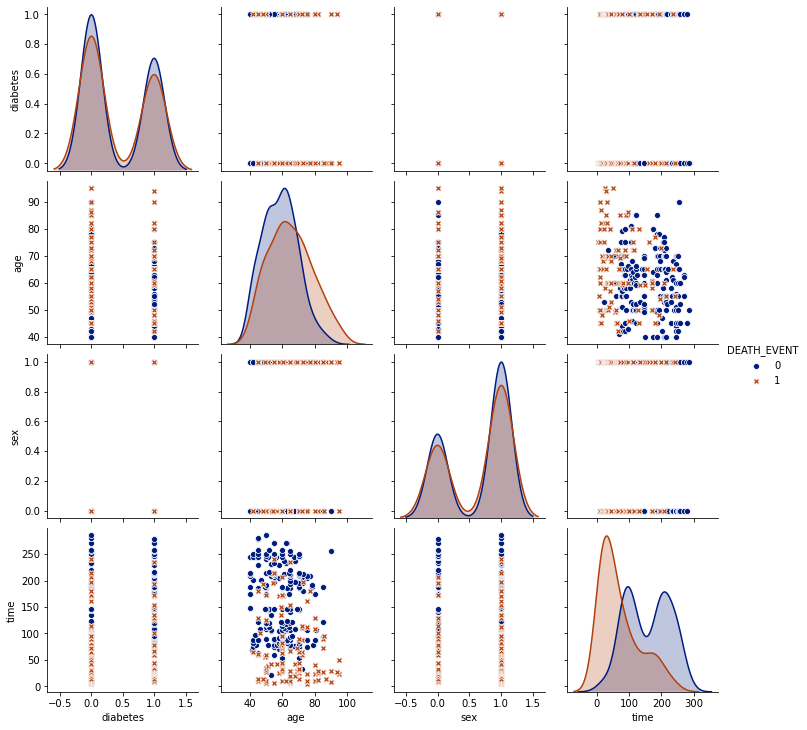

In [14]:
g2 = sns.pairplot(df,vars= ['diabetes','age','sex','time'], hue= 'DEATH_EVENT',markers=["o", "X" ],palette='dark')

N Death events to diabetic-men aged 45 to 74 years

In [29]:
H2 = df[['diabetes','age','sex','time','DEATH_EVENT']][(df['diabetes'] == 1) & (df['sex'] == 1) & (df['age'] >=45) & (df['age'] <= 74) & (df['DEATH_EVENT'] == 1)]
diab = H2['DEATH_EVENT'].count()
diab

16

N Death events to non-diabetic-men aged 45 to 74 years

In [30]:
H2 = df[['diabetes','age','sex','time','DEATH_EVENT']][(df['diabetes'] == 0) & (df['sex'] == 1) & (df['age'] >=45) & (df['age'] <= 74) & (df['DEATH_EVENT'] == 1)]
nodiab = H2['DEATH_EVENT'].count()
nodiab

26

Frequency (% Death events to diabetic-men) / (% Death events to non-diabetic-men)

In [17]:
diab/nodiab

0.9282920469361148

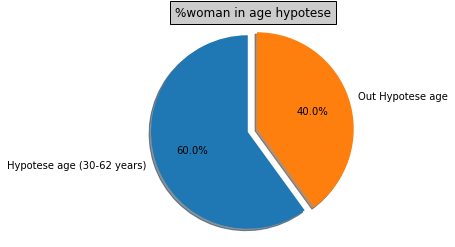

In [18]:
AW = df[['age','sex']][(df['sex'] == 0) & (df['age'] >= 30) & (df['age'] <= 62)]

labels = 'Hypotese age (30-62 years)','Out Hypotese age' 
sizes  = [(AW.count()[0]*100)/woman.count(),((woman.count()-AW.count()[0])*100)/woman.count()]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("%woman in age hypotese", bbox={'facecolor':'0.8', 'pad':5})
plt.show()



N Death events to diabetic-women aged 30 to 62 years

In [31]:
H2 = df[['diabetes','age','sex','time','DEATH_EVENT']][(df['diabetes'] == 1) & (df['sex'] == 0) & (df['age'] >=30) & (df['age'] <= 62) & (df['DEATH_EVENT'] == 1)]
diab = H2['DEATH_EVENT'].count()
diab

14

N Death events to non-diabetic-women aged 30 to 62 years

In [32]:
H2 = df[['diabetes','age','sex','time','DEATH_EVENT']][(df['diabetes'] == 0) & (df['sex'] == 0) & (df['age'] >=30) & (df['age'] <= 62) & (df['DEATH_EVENT'] == 1)]
nodiab = H2['DEATH_EVENT'].count()
nodiab

6

Frequency (% Death events to diabetic-women) / (% Death events to non-diabetic-women)

In [21]:
diab/nodiab

1.5350877192982455

**CONCLUSION**

 For this dataset, diabetic-men aged 45 to 74 years were less frequency (0.9 times) of death than non-diabetics
 Diabetic-women aged 30 to 62 year had more frequency (1.5 times) of death than non-diabetics.
 
 The hypotese doens't correspond to the value expected although just Diabetic-women had a incresing on Death events but under de 5 times frequency.  

 **Effect of Elevated Admission Serum Creatinine and Its Worsening on Outcome in Hospitalized Patients With Decompensated Heart Failure** - "Renal insufficiency (RI), as represented by elevated serum creatinine (>1.5 mg/dl) on admission, is common and found in almost half of patients hospitalized with decompensated heart failure" 


Consideration :

*Normal Values*

serum creatinine: < 1.5  mg/dL

Medical Follow-up : <=60 days


For this dataset, what the correlation of serum creatinine and death events? Is the follow-up time is relevant?

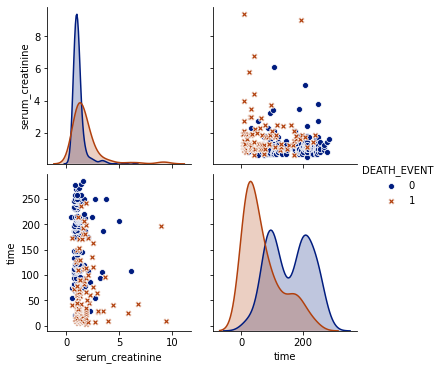

In [38]:
g3 = sns.pairplot(df,vars= ['serum_creatinine','time'], hue= 'DEATH_EVENT',markers=["o", "X" ],palette='dark')

In [74]:
H3 = df[['serum_creatinine','time','DEATH_EVENT']][(df['serum_creatinine'] > 1.5) & (df['time'] < 60) ]
deathCre = H3[(H3['DEATH_EVENT'] == 1)].count()
noDeathCre = H3[(H3['DEATH_EVENT'] == 0)].count()

total3 = H3.count()
#deathCre[0], noDeathCre[0],total3[0]


Total number of patients with serum creatinine over normal value:

In [75]:
total3[0]

23

Number of death event for total of patients with serum creatinine over normal value:

In [76]:
deathCre[0] 

21

% Death Event in total

In [77]:
deathCre[0]*100/total3[0]

91.30434782608695

%death events to follow-up over the 60 days:

In [81]:
H3 = df[['serum_creatinine','time','DEATH_EVENT']][(df['serum_creatinine'] > 1.5) & (df['time'] >= 60) ]
deathCre = H3[(H3['DEATH_EVENT'] == 1)].count()
noDeathCre = H3[(H3['DEATH_EVENT'] == 0)].count()

total3 = H3.count()
#deathCre[0], noDeathCre[0],total3[0]
deathCre[0]*100/total3[0]

50.0

Disregarding time, %Death events and total of pacients over >1.5 mg/dL

In [83]:
H3 = df[['serum_creatinine','DEATH_EVENT']][(df['serum_creatinine'] > 1.5)]
deathCre = H3[(H3['DEATH_EVENT'] == 1)].count()
noDeathCre = H3[(H3['DEATH_EVENT'] == 0)].count()

total3 = H3.count()
#deathCre[0], noDeathCre[0],total3[0]
deathCre[0]*100/total3[0], total3[0]

(64.17910447761194, 67)

**CONCLUSION**

 The value for serum creatinine (SC) are definitely significant for prediction of a heart failure. Considering the follow-up time under of 60 days, the death events for pacients with SC over normal value is equal to 91.3 % (21 pacients) in the total of 23 pacients. For pacients who follow-up were over 60 days, the death event goes to 50% (22 pacients) of total of 44 pacients. From total of 67 pacients, 64% passed away. 
 
 


**Anaemia is an independent predictor of poor outcome in patients with chronic heart failure** - "Mild anaemia is a significant and independent predictor of poor outcome in unselected patients with CHF."

What the relevance of anaemia to heart failure ?

In [106]:
H4 = df[['anaemia','DEATH_EVENT','time']]


Number of pacients with anemia x without anemia

In [99]:
H4[(H4['anaemia']==1)].count()[0], H4[(H4['anaemia']==0)].count()[0]


(129, 170)

Number of pacients with anemia and passed away

In [102]:
H4[(H4['anaemia']==1) & (H4['DEATH_EVENT']==1)].count()[0]

46

%Death anaemie pacient / total anaemie pacient

In [105]:
H4[(H4['anaemia']==1) & (H4['DEATH_EVENT']==1)].count()[0]*100/H4[(H4['anaemia']==1)].count()[0]

35.65891472868217

In [107]:
H4[(H4['anaemia']==1) & (H4['time']<= 60)].count()[0], H4[(H4['anaemia']==0) & (H4['time']<= 60)].count()[0]


(33, 30)

In [108]:
H4[(H4['anaemia']==1) & (H4['DEATH_EVENT']==1) & (H4['time']<= 60)].count()[0]

28

**GENERAL OVERVIEW**

Death by gender

In [109]:
G1 = df[['sex','DEATH_EVENT']]

In [126]:
m   = G1[(G1['sex']==1) & (G1['DEATH_EVENT']==1)]
mdp = m['sex'].count()*100/G1[(G1['sex']==1)].count()[0]

w   = G1[(G1['sex']==0) & (G1['DEATH_EVENT']==1)]
wdp = w['sex'].count()*100/G1[(G1['sex']==0)].count()[0]

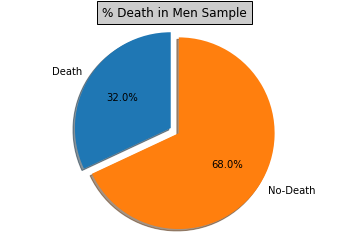

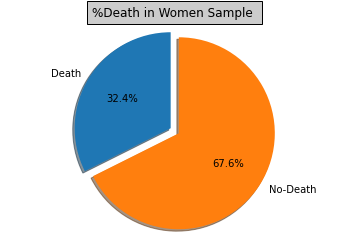

In [134]:
labels = 'Death','No-Death' 
sizes  = [mdp,100-mdp]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% Death in Men Sample", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


labels = 'Death','No-Death' 
sizes  = [wdp,100-wdp]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("%Death in Women Sample ", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Death by Age

In [187]:
G2 = df[['age','DEATH_EVENT']]
DG2 = G2[G2['DEATH_EVENT']==1]
FG2 = G2[G2['DEATH_EVENT']==0]


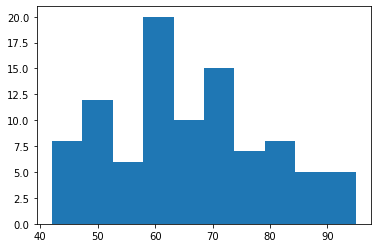

In [188]:
histogram = plt.hist(DG2['age'], bins=10)
plt.show()f

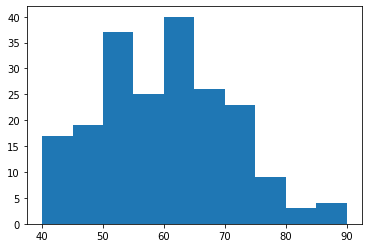

In [189]:
histogram = plt.hist(FG2['age'], bins=10)
plt.show()

Death patient smokes x not 

In [135]:
G3 = df[['smoking','DEATH_EVENT']]

In [159]:
s   = G3[(G3['smoking']==1) & (G3['DEATH_EVENT']==1)]
ns  = G3[(G3['smoking']==0) & (G3['DEATH_EVENT']==1)]                              
      
Ts   = G3[(G3['smoking']==1) & (G3['DEATH_EVENT']==0)]
Tns  = G3[(G3['smoking']==0) & (G3['DEATH_EVENT']==0)] 

#s.count()[0], Ts.count()[0], ns.count()[0], Tns.count()[0]


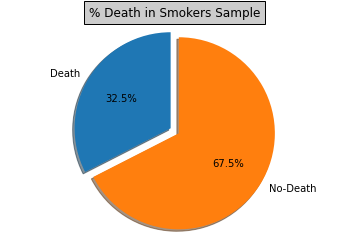

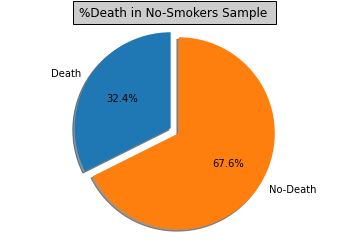

In [160]:
labels = 'Death','No-Death' 
sizes  = [ns.count()[0]*100/(ns.count()[0]+Tns.count()[0]), Tns.count()[0]*100/(ns.count()[0]+Tns.count()[0])]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("% Death in Smokers Sample", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


labels = 'Death','No-Death' 
sizes  = [wdp,100-wdp]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("%Death in No-Smokers Sample ", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Death patient with high blood pressure x not